<a href="https://colab.research.google.com/github/FG2511/ARE/blob/master/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
@File name: model1.ipynb
@Created on 2018-12-20
@Authors: Federica Gerina, Francesca Moi, Silvia Maria Massa
@Description: Given a time-series dataset that contains minute-by-minute data 
about different kind of gases, collected by the uHoo air quality sensor, train
a NN that classifies if a minute belongs to the class "Pasto" (1) otherwise to
the class "Other" (0).
'''

!pip install liac-arff

import arff
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.preprocessing import sequence
from keras import optimizers
from sklearn.utils import compute_class_weight
from keras.models import load_model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
def generate_model(shape):
  
  model = Sequential()
  '''
  model.add(Dense(32, input_dim=shape, kernel_initializer='random_uniform',  bias_initializer='zeros', activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(64, kernel_initializer='random_uniform',  bias_initializer='zeros', activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(128, kernel_initializer='random_uniform',  bias_initializer='zeros', activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(256, kernel_initializer='random_uniform',  bias_initializer='zeros', activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  print(model.summary())
  '''
  model.add(Dense(32, input_dim=shape, kernel_initializer='random_uniform',  bias_initializer='zeros'))
  model.add(LeakyReLU(alpha = 0.5))
  model.add(Dropout(0.5))
  model.add(Dense(64, kernel_initializer='random_uniform',  bias_initializer='zeros'))
  model.add(LeakyReLU(alpha = 0.5))
  model.add(Dropout(0.5))
  model.add(Dense(128, kernel_initializer='random_uniform',  bias_initializer='zeros'))
  model.add(LeakyReLU(alpha = 0.5))
  model.add(Dropout(0.5))
  model.add(Dense(256, kernel_initializer='random_uniform',  bias_initializer='zeros'))
  model.add(LeakyReLU(alpha = 0.5))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  print(model.summary())

  return model

In [0]:
#LOAD DATA
print("Loading data...")

dataset = '/root/data/Half_uHoo_featureDataset.arff'

with open (dataset, encoding='utf-8') as f:
  dataDictionary = arff.load(f)

data = np.array(dataDictionary['data'])
print("DATASET LOADED")

#CONVERTING VALUES
print("Converting values...")
for i in data:
  if(i[-1] == 'Other'): i[-1] = 0
  elif(i[-1] == 'Pasto') : i[-1] = 1

dataset = data.astype('float32')
print("CONVERSION DONE")

Loading data...
DATASET LOADED
Converting values...
CONVERSION DONE


In [0]:
#SPLIT INTO INPUT (X) AND OUTPUT (Y) VARIABLES
s = dataset.shape[-1]
#print(s)
X = dataset[:,0:s-1]
Y = dataset[:,s-1]

#SPLIT INTO TRAINING, VALIDATION AND TEST SETS
train_rate = 30
val_rate = 40
train = round(int((dataset.shape[0]*train_rate)/100))
val = round(int((dataset.shape[0]*(train_rate+val_rate))/100))

train_data = X[:train]
train_label = Y[:train]

val_data = X[train+1:val]
val_label = Y[train+1:val]

test_data = X[val+1:]
test_label = Y[val+1:]


In [0]:
#COMPUTE CLASS WEIGHT
labels = np.unique(train_label)
classWeight = compute_class_weight('balanced', labels, train_label)
classWeight = dict(zip(labels,classWeight))

#GENERATE MODEL
model = generate_model(train_data.shape[-1])

#OPTIMIZERS
sgd = optimizers.SGD(lr=0.0001)
rms = optimizers.RMSprop(lr=0.001)
adm = optimizers.Adam(lr=0.001)

#COMPILE MODEL
model.compile(loss='binary_crossentropy', optimizer = adm , metrics=['accuracy'])

#FIT MODEL
history = model.fit(train_data, train_label, epochs=3, validation_data = (val_data, val_label), batch_size = 128, shuffle = True, class_weight = classWeight, verbose=1)

#EVALUATE MODEL
'''
scores_train = model.evaluate(train_data, train_label, batch_size=128, verbose = 0)
print("Train loss: %.2f%%" % (scores[0] * 100))
print("Train accuracy: %.2f%%" % (scores[1] * 100))

scores_val = model.evaluate(val_data, val_label, batch_size=128, verbose = 0)
print("Validation loss: %.2f%%" % (scores[0] * 100))
print("Validation accuracy: %.2f%%" % (scores[1] * 100))
'''
scores_test = model.evaluate(test_data, test_label, batch_size=128, verbose = 1)
print("Test loss: %.2f%%" % (scores_test[0] * 100))
print("Test accuracy: %.2f%%" % (scores_test[1] * 100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 32)                3648      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dropout_97 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 128)               8320      
__________

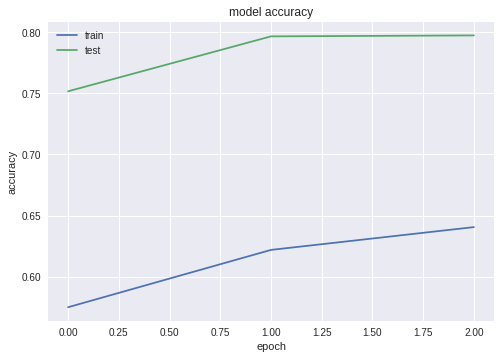

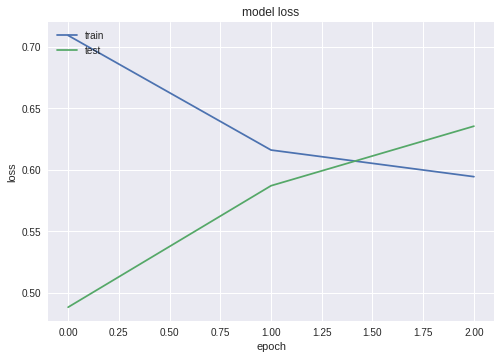

In [0]:
#PLOT RESULTS

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
model.save('my_model1.h5')

#model = load_model('my_model.h5')